# COVID-19 World Vaccination Progress Exploratory Data Analysis 

With the escalating number of COVID-19 cases around the globe, monitoring the vaccination progress across countries is of utmost importance with respect to controlling the spread of this virus. This project focuses on the current demographics of vaccinations across countries and the interesting studies emerging from studying this dataset.

Here are some of the Python libraries used in this project - 

>- Pandas: You can explore more about this library [here](https://pandas.pydata.org/)
>- Seaborn: You can explore more about this library [here](https://seaborn.pydata.org/)
>- Matplotlib: You can explore more about this library [here](https://matplotlib.org/)
>- NumPy: You can explore more about this library [here](https://numpy.org/)

## Downloading the Dataset

We will download our dataset from Kaggle, where we can find a lot of interesting datasets online. There are several options for getting the dataset into Jupyter:

>- Download the CSV manually and upload it via Jupyter's GUI
>- Use the urlretrieve function from the urllib.request to download CSV files from a raw URL
>- Use a helper library, e.g., opendatasets, which contains a collection of curated datasets and provides a helper function for
direct download.

We'll use the opendatasets helper library to download the files.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/gpreda/covid-world-vaccination-progress' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hemanyaarora
Your Kaggle Key: Â·Â·Â·Â·Â·Â·Â·Â·


100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 452k/452k [00:00<00:00, 20.8MB/s]

The dataset has been downloaded and extracted.

In [4]:
data_dir = './covid-world-vaccination-progress'

In [5]:
import os
os.listdir(data_dir)

['country_vaccinations.csv', 'country_vaccinations_by_manufacturer.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "covid-world-vaccination-progress-eda"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "hemanya56/covid-world-vaccination-progress-eda" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/hemanya56/covid-world-vaccination-progress-eda


'https://jovian.ai/hemanya56/covid-world-vaccination-progress-eda'

## Data Preparation and Cleaning
We will start by cleaning and parsing our data and see if there is any room for errors and misinformation in our data files. We will start by loading the Python libraries necessary and optimal for working with our data. In addition to this, we will limit our analysis to the following areas:
>- Demographics of a country's response to the vaccination progress over the course of time.
>- Understanding the trends of the vaccine companies in comparison with the percentage of immunized population.
>- Delineating the findings about the data and answering unique questions relevant to the information.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

Now we will import the dataset into our Pandas dataframe. 

In [11]:
covid_vaccine_df = pd.read_csv('./covid-world-vaccination-progress/country_vaccinations.csv') #read the csv file from directory and load it into the dataframe
covid_vaccine_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20385,Zimbabwe,ZWE,2021-05-20,867396.0,615296.0,252100.0,22712.0,16482.0,5.84,4.14,1.70,1109.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1396903351...
20386,Zimbabwe,ZWE,2021-05-21,887928.0,624665.0,263263.0,20532.0,16098.0,5.97,4.20,1.77,1083.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1396903351...
20387,Zimbabwe,ZWE,2021-05-22,904073.0,630348.0,273725.0,16145.0,15823.0,6.08,4.24,1.84,1065.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1396903351...
20388,Zimbabwe,ZWE,2021-05-23,911033.0,632496.0,278537.0,6960.0,16298.0,6.13,4.26,1.87,1097.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1396903351...


In [12]:
covid_vaccine_df.shape

(20390, 15)

Here we can see that the 20390 rows delineate a period of days over which we will analyze the vaccination progress of the countries. Alongside this, there are 15 columns which give us the relevant information about a country's stats with respect to the vaccination progress.

In [13]:
total_countries_df = covid_vaccine_df.country.unique()
total_countries_df

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England',
       'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faeroe Islands', 'Falkland Islands', 'Fiji', 'Finland', 'France',
       'French Polynesia', '

Here are all the countries under study for our data. 

In [14]:
np.count_nonzero(total_countries_df)

211

Here, we find that there are a total of 211 countries under consideration in our data.

In [15]:
#To understand the data with more ease, we will use the describe function
covid_vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20390 entries, 0 to 20389
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              20390 non-null  object 
 1   iso_code                             20390 non-null  object 
 2   date                                 20390 non-null  object 
 3   total_vaccinations                   11618 non-null  float64
 4   people_vaccinated                    10859 non-null  float64
 5   people_fully_vaccinated              8386 non-null   float64
 6   daily_vaccinations_raw               9671 non-null   float64
 7   daily_vaccinations                   20176 non-null  float64
 8   total_vaccinations_per_hundred       11618 non-null  float64
 9   people_vaccinated_per_hundred        10859 non-null  float64
 10  people_fully_vaccinated_per_hundred  8386 non-null   float64
 11  daily_vaccinations_per_milli

From the 'info()' function, we can say that the data type for most of the columns is consistent with respect to the values which fall under them. For instance, we can see that columns like **total_vaccinations** and **people_fully_vaccinated**  hold the same data type for all the values relative to the column, i.e. numeric. Other than that, we can state that except the columns with the **object** data type, every columns has some missing values listed as *NaN*, which are dealt with since all the values have a numeric type.

Let's understand some statistical information about the numeric columns. 

In [16]:
covid_vaccine_df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.161800e+04,1.085900e+04,8.386000e+03,9.671000e+03,2.017600e+04,11618.000000,10859.000000,8386.000000,20176.000000
mean,6.643173e+06,3.851860e+06,2.083977e+06,1.608349e+05,8.486205e+04,19.341765,13.629598,7.365014,3142.786132
std,2.907510e+07,1.433558e+07,8.919696e+06,7.718760e+05,4.911053e+05,26.566938,17.017895,11.407741,4609.729553
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.506375e+04,6.298100e+04,2.849625e+04,3.404500e+03,8.160000e+02,1.770000,1.620000,0.790000,352.750000
50%,5.378870e+05,4.160840e+05,2.217265e+05,1.783800e+04,5.912500e+03,8.380000,6.440000,3.060000,1583.000000
75%,2.516747e+06,1.740671e+06,8.917640e+05,7.056750e+04,3.103300e+04,26.172500,19.455000,8.917500,4379.000000
max,5.467140e+08,1.643783e+08,1.310786e+08,1.946100e+07,1.586071e+07,226.140000,115.730000,110.410000,118759.000000


There seems to be some problem with the maximum values of the **total_vaccinations_per_hundred** and **people_vaccinated_per_hundred** as the percentage ratio for people vaccinated cannot exceed than 100. This is a common problem with data where some of the invalid values can be entered intentionally or unintentionally. A common way in which we can solve this issue is by removing the values greater than 100 as invalid entry errors.

In [17]:
covid_vaccine_df.drop(covid_vaccine_df[covid_vaccine_df.total_vaccinations_per_hundred > 100].index, inplace=True)
covid_vaccine_df.drop(covid_vaccine_df[covid_vaccine_df.people_vaccinated_per_hundred > 100].index, inplace=True)
covid_vaccine_df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.140800e+04,1.068000e+04,8.208000e+03,9.505000e+03,1.996600e+04,11408.000000,10680.000000,8208.000000,19966.000000
mean,6.663544e+06,3.876170e+06,2.081613e+06,1.632154e+05,8.553295e+04,17.315797,12.640453,6.224808,3075.172293
std,2.933276e+07,1.445004e+07,9.008999e+06,7.783590e+05,4.936281e+05,21.781575,15.176390,8.095623,4500.409084
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.612850e+04,6.464575e+04,2.840575e+04,3.474000e+03,8.200000e+02,1.720000,1.560000,0.760000,346.000000
50%,5.373230e+05,4.184045e+05,2.231795e+05,1.815800e+04,5.915500e+03,8.010000,6.220000,2.940000,1551.500000
75%,2.423450e+06,1.690150e+06,8.666182e+05,7.121700e+04,3.104900e+04,24.735000,18.360000,8.320000,4279.000000
max,5.467140e+08,1.643783e+08,1.310786e+08,1.946100e+07,1.586071e+07,99.960000,72.020000,45.530000,118759.000000


Let's take a look at some of the additional information about our data.

In [18]:
covid_vaccine_df.isna().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                      8772
people_vaccinated                       9500
people_fully_vaccinated                11972
daily_vaccinations_raw                 10675
daily_vaccinations                       214
total_vaccinations_per_hundred          8772
people_vaccinated_per_hundred           9500
people_fully_vaccinated_per_hundred    11972
daily_vaccinations_per_million           214
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

From the data, we infer that there are a lot of *NaN* values for the first few sections of our columns for the countries. Here, we will find out the first valid index in order to understand the data with more ease.

In [19]:
covid_vaccine_df.daily_vaccinations_raw.first_valid_index()

95

In [20]:
covid_vaccine_df.loc[90:100]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
90,Afghanistan,AFG,2021-05-23,NaN,NaN,NaN,NaN,5474.0,NaN,NaN,NaN,141.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
91,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,NaN,5692.0,1.47,1.22,0.25,146.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
92,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
93,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
94,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
95,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
96,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
97,Albania,ALB,2021-01-15,308.0,308.0,NaN,42.0,62.0,0.01,0.01,NaN,22.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
98,Albania,ALB,2021-01-16,369.0,369.0,NaN,61.0,62.0,0.01,0.01,NaN,22.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
99,Albania,ALB,2021-01-17,405.0,405.0,NaN,36.0,58.0,0.01,0.01,NaN,20.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...


Here, we can see that the data for Afghanistan's daily vaccination (raw) has been missing. Looking over information from sources such as [Our World In Data](https://ourworldindata.org/coronavirus/country/afghanistan#how-many-covid-19-vaccine-doses-are-administered-daily) and [Bing COVID-19 Tracker](https://www.bing.com/covid/local/afghanistan?vert=vaccineTracker), we can infer that there is not a lot of data available for Afghanistan and the data present is accurate.

Another thing which is interesting to note is the large difference of number of *NaN* values in the columns 'daily_vaccinations_raw' and 'daily_vaccinations' given the fact that both serve the same purpose. Hence, we will drop the 'daily_vaccinations_raw' column just so in order to work with a much cleaner data

In [21]:
#As we don't need a lot of unnecessaary columns, we can also drop the 'iso_code', 'source_name', and 'source_website'
covid_vaccine_df.drop(['source_website', 'source_name', 'iso_code', 'daily_vaccinations_raw'], axis=1)

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,NaN,NaN,0.00,0.00,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
...,...,...,...,...,...,...,...,...,...,...,...
20385,Zimbabwe,2021-05-20,867396.0,615296.0,252100.0,16482.0,5.84,4.14,1.70,1109.0,Sinopharm/Beijing
20386,Zimbabwe,2021-05-21,887928.0,624665.0,263263.0,16098.0,5.97,4.20,1.77,1083.0,Sinopharm/Beijing
20387,Zimbabwe,2021-05-22,904073.0,630348.0,273725.0,15823.0,6.08,4.24,1.84,1065.0,Sinopharm/Beijing
20388,Zimbabwe,2021-05-23,911033.0,632496.0,278537.0,16298.0,6.13,4.26,1.87,1097.0,Sinopharm/Beijing


For future ease, let's change our **date** column's data-type into the pandas **datetime**.

In [22]:
covid_vaccine_df['date'] = pd.to_datetime(covid_vaccine_df.date)
covid_vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20180 entries, 0 to 20389
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              20180 non-null  object        
 1   iso_code                             20180 non-null  object        
 2   date                                 20180 non-null  datetime64[ns]
 3   total_vaccinations                   11408 non-null  float64       
 4   people_vaccinated                    10680 non-null  float64       
 5   people_fully_vaccinated              8208 non-null   float64       
 6   daily_vaccinations_raw               9505 non-null   float64       
 7   daily_vaccinations                   19966 non-null  float64       
 8   total_vaccinations_per_hundred       11408 non-null  float64       
 9   people_vaccinated_per_hundred        10680 non-null  float64       
 10  people_ful

Looking at our downloaded dataset, we will study the other data file as well in order to compare both of our data files with more ease.

In [23]:
vaccine_manf_df = pd.read_csv('./covid-world-vaccination-progress/country_vaccinations_by_manufacturer.csv')
vaccine_manf_df

,location,date,vaccine,total_vaccinations
0,Chile,2020-12-24,Pfizer/BioNTech,420
1,Chile,2020-12-25,Pfizer/BioNTech,5198
2,Chile,2020-12-26,Pfizer/BioNTech,8338
3,Chile,2020-12-27,Pfizer/BioNTech,8649
4,Chile,2020-12-28,Pfizer/BioNTech,8649
...,...,...,...,...
4281,United States,2021-05-25,Moderna,121801185
4282,United States,2021-05-25,Pfizer/BioNTech,155394989
4283,United States,2021-05-26,Johnson&Johnson,10463078
4284,United States,2021-05-26,Moderna,122339269


In [24]:
vaccine_manf_df.shape

(4286, 4)

This data file consists of 4286 rows and 4 columns, which describes the data for the number of people who took a specific vaccine from different pharma companies in different countries.

In [25]:
vaccine_manf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4286 entries, 0 to 4285
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            4286 non-null   object
 1   date                4286 non-null   object
 2   vaccine             4286 non-null   object
 3   total_vaccinations  4286 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 134.1+ KB


The entries for this dataset has no missing values as shown in the function above. Let's look further at the statistical information for this dataset.

In [26]:
vaccine_manf_df.describe()

,total_vaccinations
count,4.286000e+03
mean,5.835116e+06
std,1.943280e+07
min,0.000000e+00
25%,1.946350e+04
50%,1.993665e+05
75%,2.343187e+06
max,1.561972e+08


This concludes our readings for this dataset as upon examining both the functions, we find that both of the files are now clean and ready to be worked on.

Let's save our work before continuing.

In [27]:
import jovian

In [28]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "hemanya56/covid-world-vaccination-progress-eda" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/hemanya56/covid-world-vaccination-progress-eda


'https://jovian.ai/hemanya56/covid-world-vaccination-progress-eda'

## Exploratory Analysis and Visualization

To understand the demographics of the countries, we have to undertake the responsibility to build relationships between different components of our dataset so as we can understand the importance of exploring and answering new questions relative to our data. For instance, answering questions about the countries with the most vaccinated population per hundred or comparing the statistics of different vaccines with respect to the number of people who took them, using visualization graphs will be beneficial to build a robust way to communicate the exploratory analysis of our data with much ease.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [29]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Countries with the highest number of Immunizations

Before we move on to discover some of the key aspects of our data with respect to the countries, let's work on establishing the countries with the highest number of immunizations and other interesting findings.

In [30]:
total_vaccine_df = covid_vaccine_df.groupby("country").total_vaccinations.mean().sort_values(ascending=False).head(20)
total_vaccine_df

country
China                   2.144026e+08
United States           1.252286e+08
India                   6.883943e+07
United Kingdom          2.983116e+07
England                 2.347372e+07
Brazil                  1.976226e+07
Russia                  1.524648e+07
Germany                 1.379238e+07
Turkey                  1.314453e+07
France                  1.034307e+07
Indonesia               9.777439e+06
Italy                   9.624867e+06
Spain                   8.328696e+06
Mexico                  7.441354e+06
Chile                   7.006009e+06
Morocco                 6.331762e+06
Saudi Arabia            5.935183e+06
Poland                  5.510044e+06
United Arab Emirates    5.501797e+06
Bangladesh              5.434208e+06
Name: total_vaccinations, dtype: float64

Here are some of the countries with the highest vaccination

We can visualize this information using a bar chart.

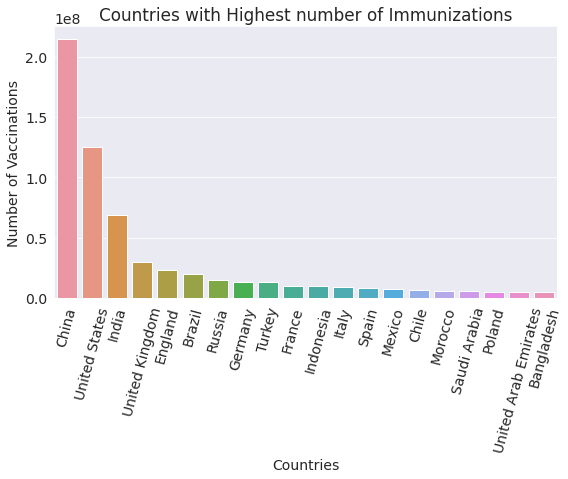

In [31]:
plt.xticks(rotation=75)
plt.title("Countries with Highest number of Immunizations")
bar = sns.barplot(x=total_vaccine_df.index, y=total_vaccine_df);
bar.set(ylabel = "Number of Vaccinations", xlabel = "Countries");

Here, the graph dileneates that China stands as the country with the largest number of people immunized, followed by United States and India respectively.

### Countries with the highest number of people fully vaccinated

Let's move on and discover the countries with the highest number of people fully vaccinated.

In [32]:
fully_vaccine_df = covid_vaccine_df.groupby("country").people_fully_vaccinated.mean().sort_values(ascending=False).head(20)
fully_vaccine_df

country
United States           5.454186e+07
India                   1.559050e+07
Brazil                  6.613920e+06
Turkey                  6.256296e+06
United Kingdom          6.240329e+06
Russia                  6.095230e+06
England                 4.842288e+06
Indonesia               3.728408e+06
Germany                 3.546123e+06
Italy                   3.458441e+06
France                  3.378078e+06
Chile                   3.054558e+06
Morocco                 3.021117e+06
Mexico                  2.876123e+06
Spain                   2.807404e+06
Bangladesh              2.631397e+06
United Arab Emirates    2.091457e+06
Poland                  1.892705e+06
Israel                  1.831060e+06
Colombia                1.169444e+06
Name: people_fully_vaccinated, dtype: float64

Let's plot this data and visualize our readings for this finding.

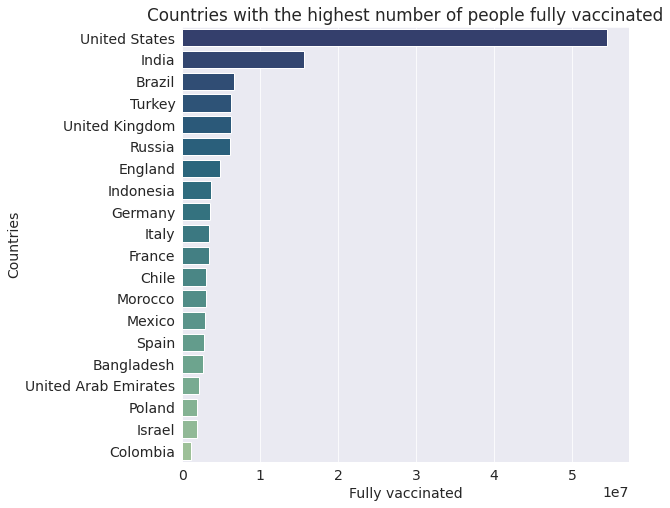

In [33]:
plt.figure(figsize = (8, 8))
plt.title("Countries with the highest number of people fully vaccinated")
graph = sns.barplot(x = fully_vaccine_df.values, y=fully_vaccine_df.index, palette = "crest_r");
graph.set(xlabel = "Fully vaccinated", ylabel = "Countries");

Here, through the graph we can say that United States is the country with largest population of people who are fully vaccinated, followed by India, Turkey, and Brazil respectively.

Let's find out more about the different types of vaccines distributed among countries. 

### Most common vaccines across countries 

In [34]:
vaccine_df = covid_vaccine_df.vaccines.unique()
vaccine_df

array(['Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V',
       'Sputnik V', 'Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Sinovac, Sputnik V', 'Pfizer/BioNTech',
       'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Sinovac', 'Moderna, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Covaxin, Oxford/AstraZeneca',
       'Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac',
       'Covaxin, Oxford/AstraZeneca, Sinopharm/Beijing',
       'Moderna, Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V',
       '

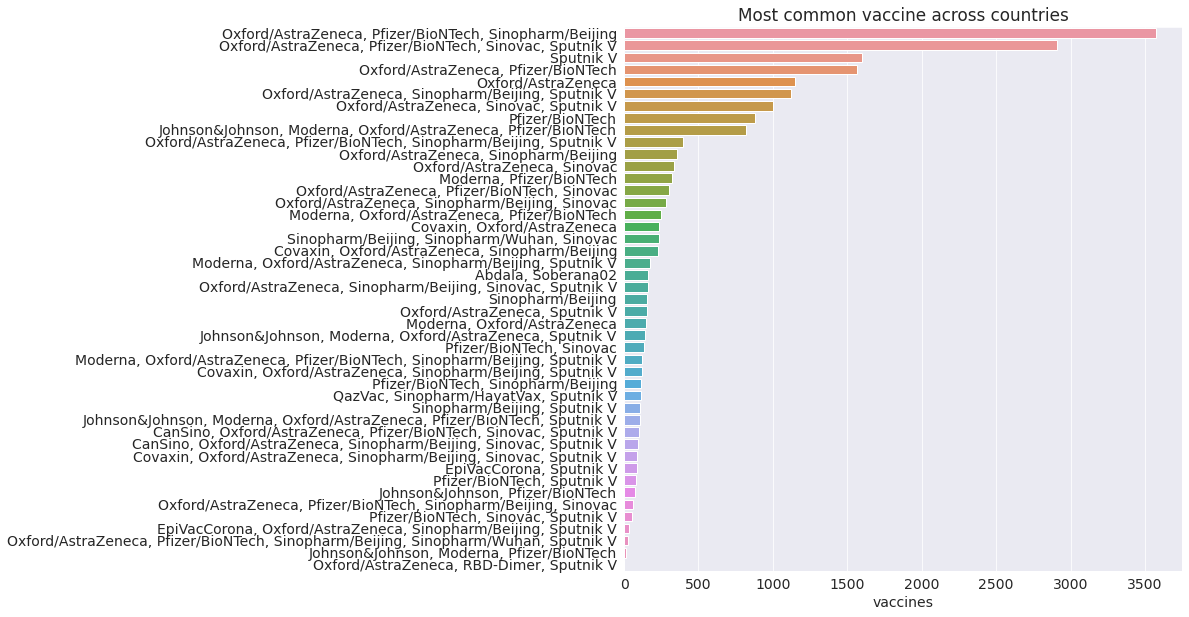

In [35]:
plt.figure(figsize = (10, 10))
plt.title("Most common vaccine across countries")
sns.barplot(x = covid_vaccine_df.vaccines.value_counts(), y = list(vaccine_df))
plt.xlabel = "Vaccine Count"
plt.ylabel = "Types of Vaccines"

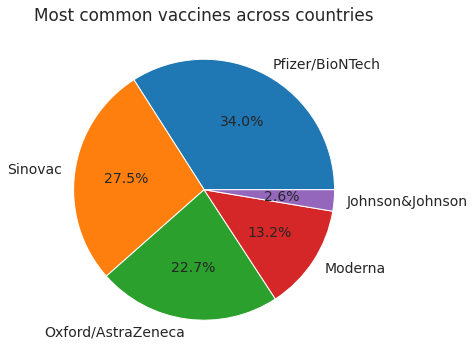

In [36]:
vaccine_most_df = vaccine_manf_df.vaccine.unique()
vaccine_most_df 
plt.figure(figsize = (6, 6))
plt.title("Most common vaccines across countries")
plt.pie(vaccine_manf_df.vaccine.value_counts(), labels = vaccine_most_df, autopct='%1.1f%%');

The pie chart delineates that Pfizer/BioNTech stands as the most used vaccine across the countries accounting about 34.0% of the total world's immunized population, followed by Sinovac and Oxford/AstraZeneca respectively.

Let's look at some more information about our data.

In [37]:
vaccinations_per_mil_df = covid_vaccine_df.groupby(covid_vaccine_df.date).daily_vaccinations_per_million.mean()
vaccinations_per_mil_df

date
2020-12-02            NaN
2020-12-03       0.000000
2020-12-04       0.000000
2020-12-05       0.000000
2020-12-06       0.000000
                 ...     
2021-05-21    4357.816456
2021-05-22    4662.174825
2021-05-23    4389.191176
2021-05-24    4413.782946
2021-05-25    4723.960000
Name: daily_vaccinations_per_million, Length: 175, dtype: float64

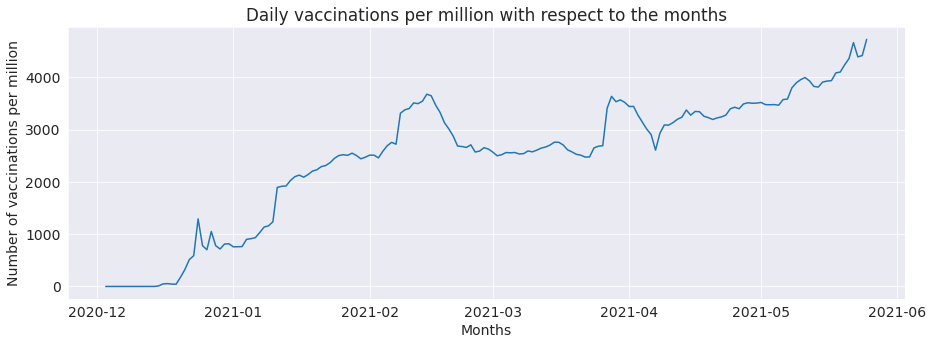

In [38]:
plt.figure(figsize = (15,5))
plt.title("Daily vaccinations per million with respect to the months")
plot = sns.lineplot(x = vaccinations_per_mil_df.index, y = vaccinations_per_mil_df.values);
plot.set(xlabel = 'Months', ylabel = 'Number of vaccinations per million');

Let us save and upload our work to Jovian before continuing

In [39]:
import jovian

In [40]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "hemanya56/covid-world-vaccination-progress-eda" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/hemanya56/covid-world-vaccination-progress-eda


'https://jovian.ai/hemanya56/covid-world-vaccination-progress-eda'

## Asking and Answering Questions

Let's look at some interesting insights about our datasets and find answers to the questions.



#### Q1: What is the date with the highest number of recorded daily immunizations across the world?

In [41]:
daily_immunization_df = covid_vaccine_df.copy()
daily_immunization_df.groupby("date").daily_vaccinations.sum().sort_values(ascending=False).head(20)

date
2021-05-24    29165459.0
2021-05-22    28861807.0
2021-05-23    28837290.0
2021-05-25    28601809.0
2021-05-21    28356318.0
2021-05-20    27560984.0
2021-05-19    26591569.0
2021-05-18    26279819.0
2021-05-17    25692045.0
2021-05-16    24879023.0
2021-05-15    23856089.0
2021-05-14    23368290.0
2021-05-13    23200837.0
2021-05-12    22816861.0
2021-05-11    21953281.0
2021-05-10    21012261.0
2021-04-30    20824332.0
2021-05-01    20700788.0
2021-05-02    20380731.0
2021-05-09    20147647.0
Name: daily_vaccinations, dtype: float64

It looks like the highest number of daily vaccinations reported across the world were the highest on May 24, 2021 followed by May 22, 2021 and May 23, 2021 respectively.

#### Q2: What is the relation between total vaccinations per hundred and people vaccinated per hundred?

In [42]:
vaccine_per_hund = covid_vaccine_df.groupby("date").total_vaccinations_per_hundred.mean().sort_values(ascending=False).head(10)
people_per_hund = covid_vaccine_df.groupby("date").people_vaccinated_per_hundred.mean().sort_values(ascending=False).head(10)

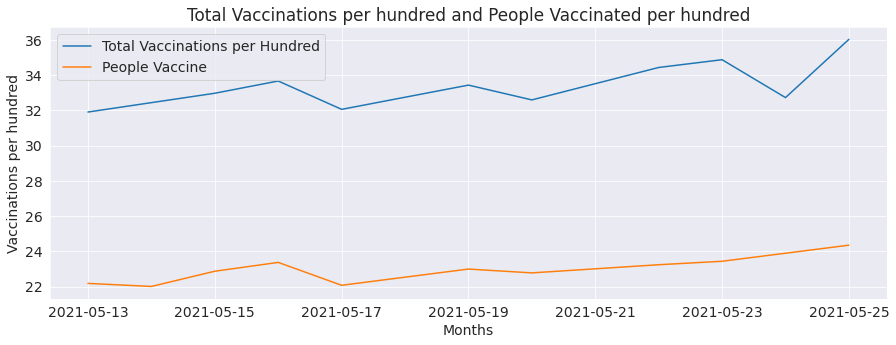

In [43]:
plt.figure(figsize = (15, 5))
ax = sns.lineplot(x = vaccine_per_hund.index, y = vaccine_per_hund.values);
ax = sns.lineplot(x = people_per_hund.index, y = people_per_hund.values);
ax.set(xlabel = "Months", ylabel = "Vaccinations per hundred")
plt.legend(['Total Vaccinations per Hundred', 'People Vaccine'])
plt.title("Total Vaccinations per hundred and People Vaccinated per hundred");

From the graph, it looks like the number of Total vaccinations per hundred is greater than people vaccinated per hundred. Let's move forward and explore more questions with respect to our data.

#### Q3: Which country has the highest number of daily vaccinations per million?

In [44]:
daily_per_mil_df = covid_vaccine_df.groupby("country").daily_vaccinations_per_million.mean().sort_values(ascending=False).head(20)
daily_per_mil_df

country
Falkland Islands        21277.687500
Gibraltar               17128.653333
Nauru                   16171.200000
Bhutan                  16056.183333
San Marino              14148.795181
Curacao                 13244.368421
Aruba                   12844.833333
Israel                  12725.077922
Saint Helena            12482.100000
Wallis and Futuna       10962.571429
Seychelles              10938.271930
Mongolia                 8610.043478
United Arab Emirates     8499.110092
Uruguay                  8471.528736
Anguilla                 8430.823529
Bermuda                  8244.312977
Jersey                   8166.863636
Cayman Islands           7883.000000
Maldives                 7743.900000
Malta                    7698.991736
Name: daily_vaccinations_per_million, dtype: float64

Here, we find that Falkland Islands is the country with the highest number of daily vaccinations per million across the world, followed by Gibraltar and Nauru respectively.

Let's plot this data with the help of a bar graph.

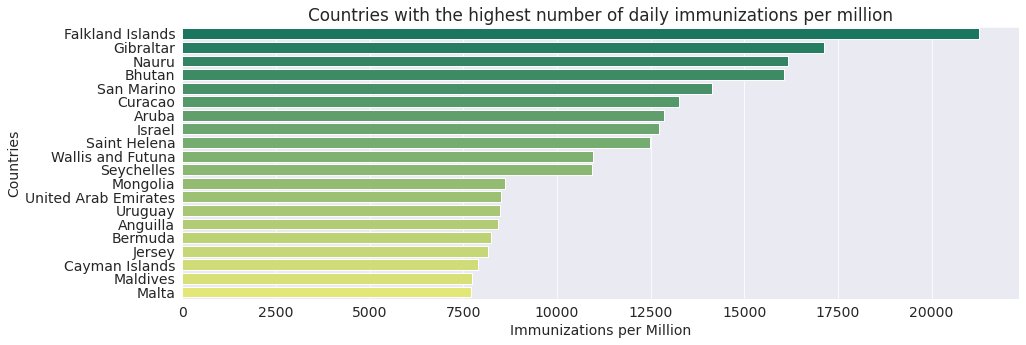

In [45]:
plt.figure(figsize=(15, 5))
graph = sns.barplot(x = daily_per_mil_df.values, y = daily_per_mil_df.index, palette="summer");
plt.title("Countries with the highest number of daily immunizations per million");
graph.set(xlabel = 'Immunizations per Million', ylabel = 'Countries');

#### Q4: Which country has the lowest number of daily vaccinations?

In [46]:
lowest_df = covid_vaccine_df.groupby("country").daily_vaccinations.mean().sort_values(ascending = True).head(20)
lowest_df

country
Montserrat                           24.470588
Syria                                66.000000
Falkland Islands                     74.109375
Saint Helena                         75.777778
Liechtenstein                       120.394737
Papua New Guinea                    121.755556
Wallis and Futuna                   123.285714
Anguilla                            126.480392
Djibouti                            141.513514
Saint Vincent and the Grenadines    146.206349
Greenland                           147.661017
South Sudan                         155.265306
Nauru                               175.200000
Sint Maarten (Dutch part)           199.000000
Grenada                             203.797753
Monaco                              204.158273
Faeroe Islands                      212.215517
Sao Tome and Principe               217.375000
Somalia                             228.631579
Saint Kitts and Nevis               229.247191
Name: daily_vaccinations, dtype: float64

Here we see that Montserrat stands as the country with the lowest number of daily vaccinations, followed by Syria.


Let's plot a bar graph to put things into perspective.

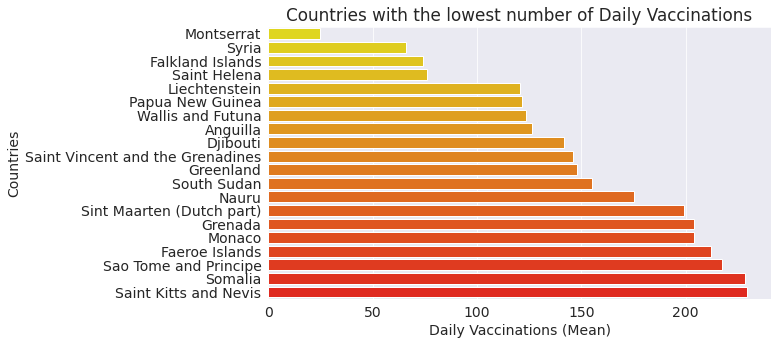

In [47]:
plot = sns.barplot(x = lowest_df.values, y = lowest_df.index, palette = "autumn_r");
plot.set(xlabel = "Daily Vaccinations (Mean)", ylabel = "Countries");
plt.title("Countries with the lowest number of Daily Vaccinations");

#### Q5: Display the statistics of India with respect to its demographics for daily vaccinations

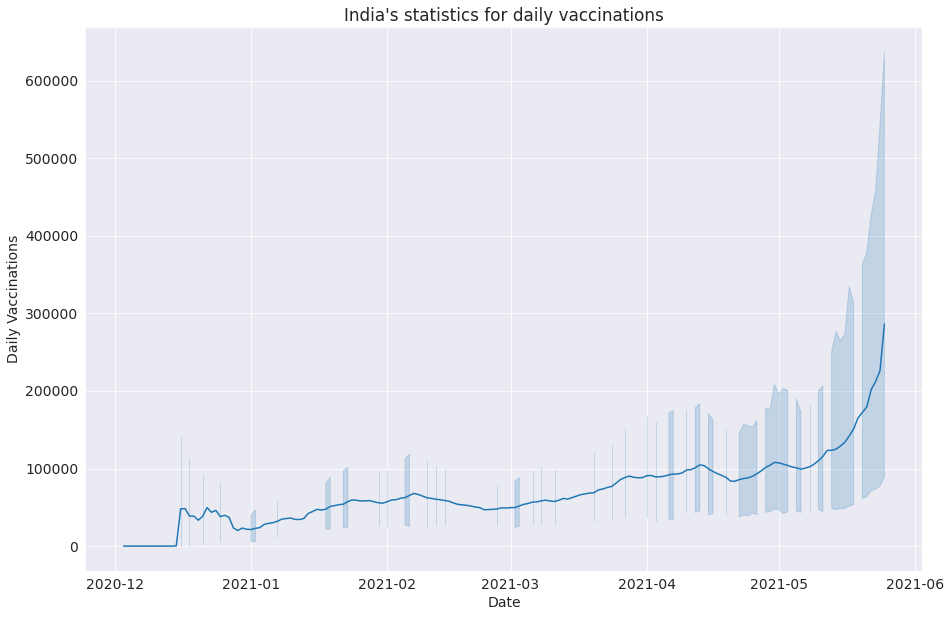

In [48]:
plt.figure(figsize = (15, 10))
India = sns.lineplot(x = covid_vaccine_df.date, y = covid_vaccine_df.daily_vaccinations, data = covid_vaccine_df[covid_vaccine_df["country"] == "India"]);
India.set(xlabel = "Date", ylabel = "Daily Vaccinations");
plt.title("India's statistics for daily vaccinations");

Let us save and upload our work to Jovian before continuing.

In [49]:
import jovian

In [50]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "hemanya56/covid-world-vaccination-progress-eda" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/hemanya56/covid-world-vaccination-progress-eda


'https://jovian.ai/hemanya56/covid-world-vaccination-progress-eda'

## Inferences and Conclusion

In conclusion, we can say that even though we are progressing with making the masses get back to the same life before the pandemic, we are still really far from achieving this dream. We all have to come together as individuals and take our part in making our world COVID free and contribute by getting ourselves immunized. 

In [51]:
import jovian

In [52]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "hemanya56/covid-world-vaccination-progress-eda" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/hemanya56/covid-world-vaccination-progress-eda


'https://jovian.ai/hemanya56/covid-world-vaccination-progress-eda'

## References and Future Work

Here are some of the links I found useful in completing this project:

- [Our World In Data](https://ourworldindata.org/coronavirus/country/afghanistan#how-many-covid-19-vaccine-doses-are%20administered-daily)
- [Bing COVID-19 Tracker](https://www.bing.com/covid/local/afghanistan?vert=vaccineTracker)

In [53]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>